# RTP anomaly

This code calculates the RTP anomaly of the simple model data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.vis import mpl

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


### Auxiliary functions

In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as sf

# Input

In [3]:
model_dir = 'model.pickle'
grid_dir = 'grid.pickle'
data_dir = 'data.pickle'

### Importing model parameters

In [4]:
with open(model_dir) as w:
        model = pickle.load(w)

### Observation points and observed data

In [5]:
with open(grid_dir) as w:
        grid = pickle.load(w)

In [6]:
with open('data.pickle') as w:
        data = pickle.load(w)

In [7]:
# observed data and observation points
dobs = data['tfa_obs']
xp = grid['x']
yp = grid['y']
zp = grid['z']
N = grid['N']

## Calculating the RTP anomaly

In [8]:
zc = np.zeros_like(xp) + 350

inc, dec = data['main_field']
incs = model['inc']
decs = model['dec']

A = sf.sm_tf_sphere(xp, yp, zp, xp, yp, zc, inc, dec, incs, decs)

In [9]:
mu = 1.e-4*np.trace(np.dot(A.T, A))/N
lp = np.linalg.solve(np.dot(A.T,A) + mu*np.identity(xp.size), np.dot(A.T,dobs))

In [10]:
dp = np.dot(A, lp)

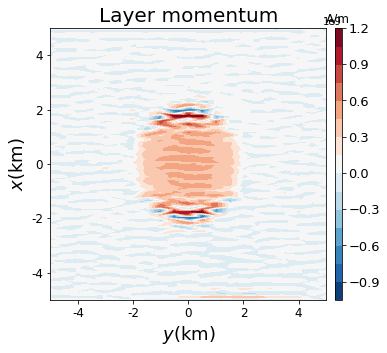

In [11]:
plt.figure(figsize=(6,5))

plt.title('Layer momentum', fontsize=20)
plt.tricontourf(yp, xp, lp, 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()

plt.show()

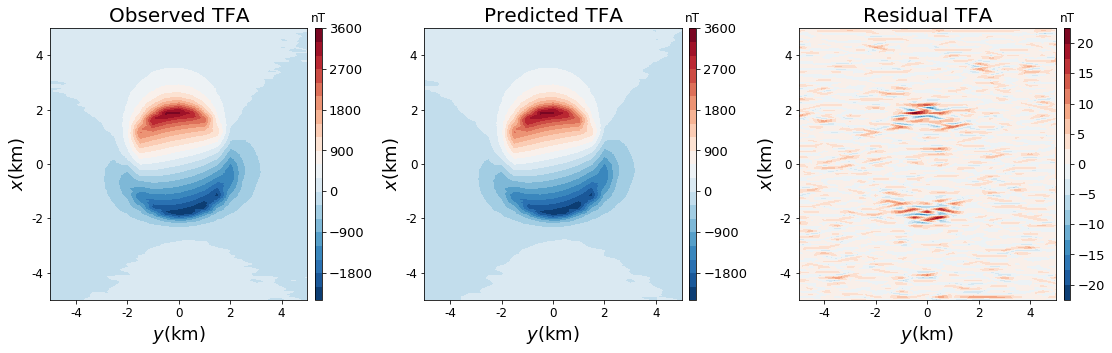

In [12]:
plt.figure(figsize=(19,5))

plt.subplot(131)
plt.title('Observed TFA', fontsize=20)
plt.tricontourf(yp, xp, dobs, 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(132)
plt.title('Predicted TFA', fontsize=20)
plt.tricontourf(yp, xp, dp, 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(133)
plt.title('Residual TFA', fontsize=20)
plt.tricontourf(yp, xp, dobs - dp, 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.show()

In [13]:
G = sf.sm_tf_sphere(xp, yp, zp, xp, yp, zc, 90., 0., 90., 0.)

In [14]:
model['prisms'][0].props

{'magnetization': array([ 5.71386445,  0.90498722, -6.89439999])}

In [15]:
rtp = np.dot(G, lp)

In [16]:
for m in model['prisms']:
    m.addprop('magnetization', utils.ang2vec(model['intensity'], 90., 0.))

In [17]:
model['prisms'][0].props

{'magnetization': array([5.5109106e-16, 0.0000000e+00, 9.0000000e+00])}

In [18]:
rtp_true = polyprism.tf(xp, yp, zp,
                           model['prisms'], 90., 0.)

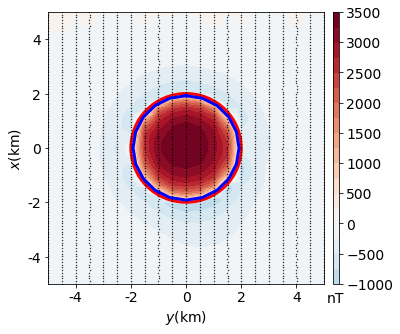

In [19]:
plt.figure(figsize=(6,5))

x0 = 0.
y0 = 0.

ax = plt.subplot(111)
#plt.title('Predicted RTP', fontsize=20)
circle1 = plt.Circle((y0, x0), 2000, color='r', linewidth=3., fill=False)
plt.tricontourf(yp, xp, rtp, 20, cmap='RdBu_r',
               vmin=-np.max(rtp), vmax=np.max(rtp)).ax.tick_params(labelsize=14)
plt.plot(yp, xp, '.k', markersize=.8)
plt.xlabel('$y$(km)', fontsize=14)
plt.ylabel('$x$(km)', fontsize=14)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=14)
clb.ax.set_title('nT', pad=-290, fontsize=14)
ax.add_artist(circle1)
mpl.polygon(model['prisms'][0], '-b', linewidth=3., xy2ne=True)
mpl.m2km()
plt.show()

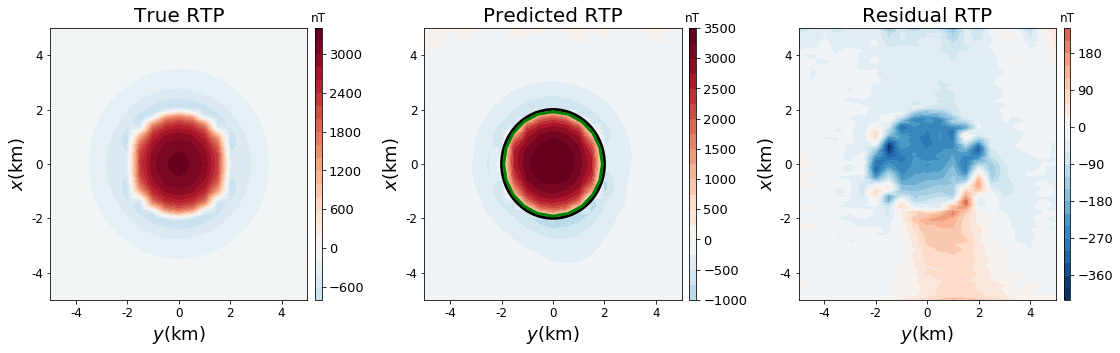

In [20]:
plt.figure(figsize=(19,5))

plt.subplot(131)
plt.title('True RTP', fontsize=20)
plt.tricontourf(yp, xp, rtp_true, 20, cmap='RdBu_r', vmin=-np.max(rtp_true), vmax=np.max(rtp_true)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

ax2 = plt.subplot(132)
plt.title('Predicted RTP', fontsize=20)
circle1 = plt.Circle((0, 0), 2000, color='k', linewidth=3., fill=False)
plt.tricontourf(yp, xp, rtp, 20, cmap='RdBu_r', vmin=-np.max(rtp_true), vmax=np.max(rtp_true)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.polygon(model['prisms'][0], '-g', linewidth=3., xy2ne=True)
ax2.add_artist(circle1)
mpl.m2km()

plt.subplot(133)
plt.title('Residual RTP', fontsize=20)
plt.tricontourf(yp, xp, rtp_true - rtp, 20, cmap='RdBu_r', vmin=np.min(rtp_true - rtp), vmax=-np.min(rtp_true - rtp)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.show()

In [21]:
with open('data.pickle', 'w') as f:
    pickle.dump(data, f)